In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [71]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        self.weights = np.zeros(X.shape[1])
        
        for epoch in range(epochs):

            for batch in range(len(X)//batch_size):
                X_batch =  X[batch*batch_size : (batch+1)*batch_size]
                y_batch =  y[batch*batch_size : (batch+1)*batch_size]
                gradient = np.dot(np.transpose(X_batch), np.dot(X_batch, self.weights) - y_batch)*2/batch_size
                self.weights -= lr * gradient
            self.epoch.append(epoch)
            if ((epoch % 1000000) == 0):
                print("epoch ",epoch,": ",self.get_loss(X, y))
            self.train_loss.append(self.get_loss(X, y))

    def get_loss(self, X, y):
        return np.average(np.power(np.dot(X, self.weights) - y, 2))

    def predict(self, X):
        return np.dot(X,self.weights)
                
    def evaluate(self, X, y):
        return self.get_loss(X, y)
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss,'b' ,label = "Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()
        
        plt.plot(self.epoch[100000:], self.train_loss[100000:],'b' ,label = "Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

# Load data & data pre-processing

In [72]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [73]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [76]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################


# You may try different label encoding for training your own model
for label in ["sex","smoker","region"] :
    if label == "sex":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "sex"] == "female"):
                df_train.at[i, "sex"] = 0
            else:
                df_train.at[i, "sex"] = 1
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "sex"] == "female"):
                df_test.at[i, "sex"] = 0
            else:
                df_test.at[i, "sex"] = 1
                
        for i in range(df_val.shape[0]):
            if (df_val.at[i, "sex"] == "female"):
                df_val.at[i, "sex"] = 0
            else:
                df_val.at[i, "sex"] = 1
                
    if label == "smoker":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "smoker"] == "no"):
                df_train.at[i, "smoker"] = 0
            else:
                df_train.at[i, "smoker"] = 1
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "smoker"] == "no"):
                df_test.at[i, "smoker"] = 0
            else:
                df_test.at[i, "smoker"] = 1
                
        for i in range(df_val.shape[0]):
            if (df_val.at[i, "smoker"] == "no"):
                df_val.at[i, "smoker"] = 0
            else:
                df_val.at[i, "smoker"] = 1
                
    if label == "region":
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "region"] == "northeast"):
                df_train.at[i, "region"] = 0
            if (df_train.at[i, "region"] == "northwest"):
                df_train.at[i, "region"] = 1
            if (df_train.at[i, "region"] == "southeast"):
                df_train.at[i, "region"] = 2
            if (df_train.at[i, "region"] == "southwest"):
                df_train.at[i, "region"] = 3

        for i in range(df_test.shape[0]):
            if (df_test.at[i, "region"] == "northeast"):
                df_test.at[i, "region"] = 0
            if (df_test.at[i, "region"] == "northwest"):
                df_test.at[i, "region"] = 1
            if (df_test.at[i, "region"] == "southeast"):
                df_test.at[i, "region"] = 2
            if (df_test.at[i, "region"] == "southwest"):
                df_test.at[i, "region"] = 3

        for i in range(df_val.shape[0]):
            if (df_val.at[i, "region"] == "northeast"):
                df_val.at[i, "region"] = 0
            if (df_val.at[i, "region"] == "northwest"):
                df_val.at[i, "region"] = 1
            if (df_val.at[i, "region"] == "southeast"):
                df_val.at[i, "region"] = 2
            if (df_val.at[i, "region"] == "southwest"):
                df_val.at[i, "region"] = 3  

    #One hot vector            
    if label == "region":
        np_one_hot_train = np.zeros((df_train.shape[0],4))
        np_one_hot_test = np.zeros((df_test.shape[0],4))
        np_one_hot_val = np.zeros((df_val.shape[0],4))
        
        for i in range(df_train.shape[0]):
            if (df_train.at[i, "region"] == "northeast"):
                np_one_hot_train[i][0] = 1
            if (df_train.at[i, "region"] == "northwest"):
                np_one_hot_train[i][1] = 1
            if (df_train.at[i, "region"] == "southeast"):
                np_one_hot_train[i][2] = 1
            if (df_train.at[i, "region"] == "southwest"):
                np_one_hot_train[i][3] = 1
        
        one_hot_train = pd.DataFrame(np_one_hot_train)
        one_hot_train.columns = ["northeast","northwest","southeast","southwest"]
        df_train = df_train.drop(['region'], axis=1)
        df_train = df_train.join(one_hot_train)
        
        for i in range(df_test.shape[0]):
            if (df_test.at[i, "region"] == "northeast"):
                np_one_hot_test[i][0] = 1
            if (df_test.at[i, "region"] == "northwest"):
                np_one_hot_test[i][1] = 1
            if (df_test.at[i, "region"] == "southeast"):
                np_one_hot_test[i][2] = 1
            if (df_test.at[i, "region"] == "southwest"):
                np_one_hot_test[i][3] = 1
                
        one_hot_test = pd.DataFrame(np_one_hot_test)
        one_hot_test.columns = ["northeast","northwest","southeast","southwest"]
        df_test = df_test.drop(['region'], axis=1)
        df_test = df_test.join(one_hot_test)

        for i in range(df_val.shape[0]):
            if (df_val.at[i, "region"] == "northeast"):
                np_one_hot_val[i][0] = 1
            if (df_val.at[i, "region"] == "northwest"):
                np_one_hot_val[i][1] = 1
            if (df_val.at[i, "region"] == "southeast"):
                np_one_hot_val[i][2] = 1
            if (df_val.at[i, "region"] == "southwest"):
                np_one_hot_val[i][3] = 1
        
        one_hot_val = pd.DataFrame(np_one_hot_val)
        one_hot_val.columns = ["northeast","northwest","southeast","southwest"]
        df_val = df_val.drop(['region'], axis=1)
        df_val = df_val.join(one_hot_val)

# Single feature (using bmi)

In [77]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [78]:
# TODO
# You may convert data to NumPy here 

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

x_train = np.concatenate((x_train, np.ones([x_train.shape[0], 1])), axis = 1).astype(float)
x_test = np.concatenate((x_test, np.ones([x_test.shape[0], 1])), axis = 1).astype(float)
x_val = np.concatenate((x_val, np.ones([x_val.shape[0], 1])), axis = 1).astype(float)

In [79]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 1.5e-5
epochs = 10000000

#linear_reg = LinearRegression()
#linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [80]:
#print("Intercepts: ", linear_reg.weights[-1])
#print("Weights: ", linear_reg.weights[:-1])

In [81]:
#print('training loss: ', linear_reg.evaluate(x_train, y_train))

In [82]:
#print('validation loss: ', linear_reg.evaluate(x_val, y_val))

In [83]:
#test_pred = linear_reg.predict(x_test)

In [84]:
#linear_reg.plot_curve()

In [85]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO

# plt.show()

# Multiple features

In [86]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [87]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

x_train = np.concatenate((x_train, np.ones([x_train.shape[0], 1])), axis = 1).astype(float)
x_test = np.concatenate((x_test, np.ones([x_test.shape[0], 1])), axis = 1).astype(float)
x_val = np.concatenate((x_val, np.ones([x_val.shape[0], 1])), axis = 1).astype(float)

In [88]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 2e-6
epochs = 100000000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.
epoch  0 :  313107873.08152825
epoch  1000000 :  63143275.37566199
epoch  2000000 :  44696120.339398615
epoch  3000000 :  39062798.42544413
epoch  4000000 :  37146141.391322576
epoch  5000000 :  36352850.817592636
epoch  6000000 :  35930830.63641927
epoch  7000000 :  35654884.15281335
epoch  8000000 :  35452436.48683943
epoch  9000000 :  35296240.29237665
epoch  10000000 :  35173346.04662942
epoch  11000000 :  35075949.645098664
epoch  12000000 :  34998556.91642937
epoch  13000000 :  34937000.77044378
epoch  14000000 :  34888023.80146296
epoch  15000000 :  34849050.59622669
epoch  16000000 :  34818036.46005954
epoch  17000000 :  34793355.60410221
epoch  18000000 :  34773714.61965032
epoch  19000000 :  34758084.3241598
epoch  20000000 :  34745645.725657865
epoch  21000000 :  34735747.07886485
epoch  22000000 :  34727869.72694237
epoch  23000000 :  34721600.92305719
epoch  24000000 :  34716612.20311293
epoch  25000000 :  34712642.17513772
epoch  26000000 :  34709482.82317463

In [ ]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  -11814.839692746029
Weights:  [  259.65348488  -386.26668606   332.37855019   441.86147826
 24030.47187493  -416.82483442]


In [ ]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697221.498985894


In [ ]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41955569.05568633


In [ ]:
test_pred = linear_reg.predict(x_test)

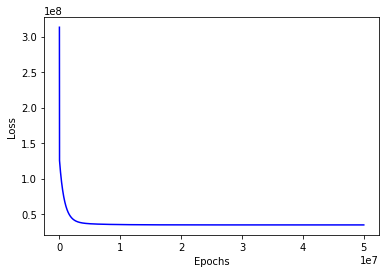

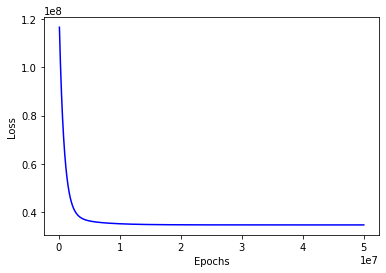

In [ ]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [ ]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200,)


AssertionError: 

# Output the csv file

In [ ]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")